In [2]:
def convert(imgf, labelf, outf, n) :
    f = open(imgf , "rb")
    o = open(outf, "w")
    I = open(labelf, "rb")
    
    f.read(16)
    I.read(8)
    images = []
    
    for i in range(n):
        image = [ord(I.read(1))]
        for j in range(28 * 28):
            image.append(ord(f.read(1)))
        images.append(image)
        
    for image in images:
        o.write(",".join(str(pix) for pix in image) + "\n")
        
    f.close()
    o.close()
    I.close()
    
convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte", "mnist_train.csv", 60000)
convert ("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte", "mnist_test.csv", 10000)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('mnist_train.csv', index_col = 0)
test_df = pd.read_csv('mnist_test.csv', index_col = 0)

In [4]:

train_feat = pd.DataFrame(train_df.loc[ (train_df.index == 1) | (train_df.index == 2) | (train_df.index == 3)| (train_df.index == 4)])
train_labels = train_feat.index

test_feat = pd.DataFrame(test_df.loc[ (test_df.index == 1) | (test_df.index == 2) | (test_df.index == 3)| (test_df.index == 4)])
test_labels = test_feat.index

train_feat /= 255 
test_feat  /= 255

In [5]:
from sklearn.neural_network import MLPClassifier
train_score = []
test_score = []
for i in range(20):
    MLP = MLPClassifier(hidden_layer_sizes = (200, 100), solver='adam',warm_start=True, max_iter=1,  learning_rate_init=0.01)
    MLP.fit(train_feat, train_labels)
    test_score.append((MLP.score(test_feat, test_labels)))
    train_score.append((MLP.score(train_feat, train_labels)))

C:\Users\SJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting 

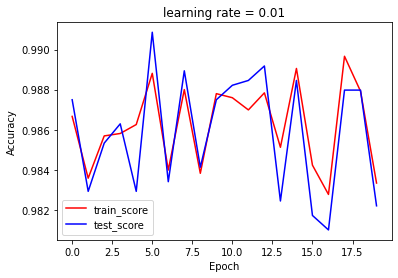

In [8]:
import matplotlib.pyplot as plt

f = plt.plot(train_score,color = 'red')
f = plt.plot(test_score,color = 'blue')
f = plt.legend(['train_score', 'test_score'])
f = plt.title('learning rate = 0.01')
f = plt.ylabel('Accuracy')
f = plt.xlabel('Epoch')


In [9]:
train_score = []
test_score = []
for i in range(20):
    MLP = MLPClassifier(hidden_layer_sizes = (200, 100), solver='adam',warm_start=True, max_iter=1,  learning_rate_init=1)
    MLP.fit(train_feat, train_labels)
    test_score.append((MLP.score(test_feat, test_labels)))
    train_score.append((MLP.score(train_feat, train_labels)))
    


C:\Users\SJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SJ\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting 

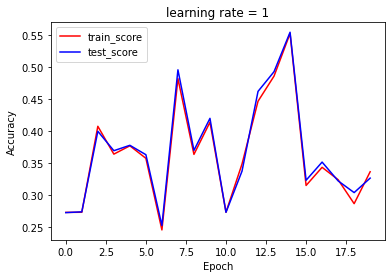

In [10]:
    
f = plt.plot(train_score,color = 'red')
f = plt.plot(test_score,color = 'blue')
f = plt.legend(['train_score', 'test_score'])
f = plt.title('learning rate = 1')
f = plt.ylabel('Accuracy')
f = plt.xlabel('Epoch')